In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import sys, glob, os, subprocess
import matplotlib.pyplot as plt

sys.path.append('../MOASMO_support/')
from mo_evaluation import *

In [2]:
df_info = pd.read_csv('/glade/derecho/scratch/guoqiang/CTSM_LargeSample_HongxiangYan/Features_CAMELS_basins.csv')
ids = [f'{i:08}' for i in df_info['Gauge_ID'].values]

mean/median max KGE for all basins 0.30851043828523966 0.4264482997246457


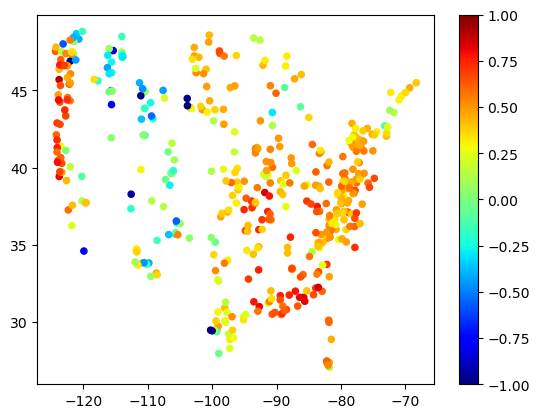

In [3]:
# evaluate ensemble outputs

inpath_HY = '/glade/derecho/scratch/guoqiang/CTSM_LargeSample_HongxiangYan/NLDAS2_forcing/Flow_series_ensemble_parameter'
inpath_defa = '/glade/derecho/scratch/guoqiang/CTSM_LargeSample_HongxiangYan/NLDAS2_forcing/Flow_series_default_parameter/'

outfile = f'{inpath_HY}/eval_kge.npz'

# if os.path.isfile(outfile):
if False:
    d = np.load(outfile)
    kge_clm_yh = d['kge_clm_yh']

else:
    
    es = 365*5

    # n = 1307
    num = 1298
    kge_clm_yh = np.nan * np.zeros([len(ids), num])
    for b in range(len(ids)):
        file_ens = f'{inpath_HY}/{ids[b]}_daily_ensemble.csv'
        file_defa = f'{inpath_defa}/{ids[b]}_daily.csv'
        
        df_ens = pd.read_csv(file_ens, index_col=False)
        df_ens = df_ens.rename(columns={'# par1': 'par1'})

        df_defa = pd.read_csv(file_defa)
        dobs = df_defa[' obs_flow_m3/s'].values
        dobs = np.array( [np.float64(i) for i in dobs])
        dobs[dobs<0]=np.nan
        
        for p in range(num):
            dest = df_ens[f'par{p+1}'].values
            kge_clm_yh[b, p] = get_modified_KGE(dobs[-es:], dest[-es:]) # only the last five years

    np.savez_compressed(outfile, kge_clm_yh=kge_clm_yh)

kge_max = np.nanmax(kge_clm_yh, axis=1)
print('mean/median max KGE for all basins', np.nanmean(kge_max), np.nanmedian(kge_max))

# plt.plot(dobs, linewidth=0.4, alpha=0.4, label='obs')
# plt.plot(dest, linewidth=0.4, alpha=0.4, label='est')

lat = df_info['Gauge_Lat'].values
lon = df_info['Gauge_Lon'].values
plt.scatter(lon, lat, 20, kge_max, cmap='jet', vmin=-1, vmax=1)
plt.colorbar()

mean/median max KGE for all basins -1.3686321442644085 0.1013011595890212


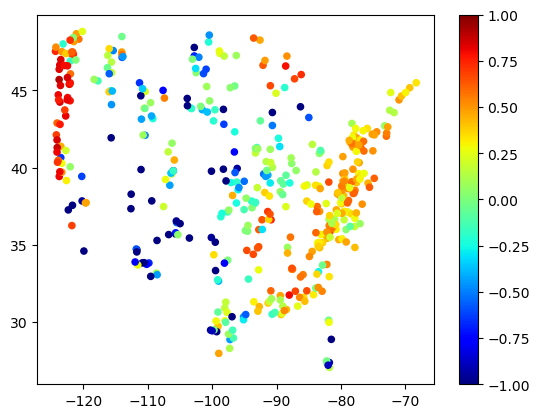

In [14]:
# evaluate a-priori outputs

inpath_HY = '/glade/derecho/scratch/guoqiang/CTSM_LargeSample_HongxiangYan/NLDAS2_forcing/Flow_series_default_parameter/'

outfile = f'{inpath_HY}/eval_kge.npz'

if os.path.isfile(outfile):
# if False:
    d = np.load(outfile)
    kge_clm_yh = d['kge_clm_yh']

else:
    
    es = 365*5
    kge_clm_yh = np.nan * np.zeros(len(ids))
    for b in range(len(ids)):
        # print(b)
        file = f'{inpath_HY}/{ids[b]}_daily.csv'
        df_yh = pd.read_csv(file, index_col=False)
        df_yh = df_yh.rename(columns={'# par1': 'par1'})
        
        dobs = df_yh[' obs_flow_m3/s'].values
        dobs = np.array( [np.float64(i) for i in dobs])
        dobs[dobs<0]=np.nan
        
        dest = df_yh[f'sim_flow_m3/s'].values
        dest = np.array( [np.float64(i) for i in dest])
        
        kge_clm_yh[b] = get_modified_KGE(dobs[-es:], dest[-es:]) # only the last five years
            
    np.savez_compressed(outfile, kge_clm_yh=kge_clm_yh)

print('mean/median max KGE for all basins', np.nanmean(kge_clm_yh), np.nanmedian(kge_clm_yh))

lat = df_info['Gauge_Lat'].values
lon = df_info['Gauge_Lon'].values
plt.scatter(lon, lat, 20, kge_max, cmap='jet', vmin=-1, vmax=1)
plt.colorbar()